# Solving the Schrodinger equation numerically

<b>Author:</b> Audun Skau Hansen <a href="mailto:a.s.hansen@kjemi.uio.no">✉️</a> 

The Hylleraas Centre for Quantum Molecular Sciences and
The Centre for Computing in Science Education,
2022


---

## Finite difference schemes

You may be aware that we have quite an arsenal of numerical methods which may help us solve differential equations. (If not, take a look at the section on discrete calculus.) This is also true for the Schrödinger equation, at least in the one dimensional case. 

Amongst these, *finite difference methods* consists of essentially two steps:

1. Discretization of the variables: $x \rightarrow x_n := n\Delta x$
2. Discrete approximation of differentials; $\frac{d}{dx} f(x) \approx \hat{D}f(x) = F(...,f(x_{n-1}), f(x_{n}), f(x_{n+1}), ..., \Delta x)$ 

In the following, we'll use the *center difference*

$$
\frac{d^2}{dx^2} \psi(x) \approx \hat{D}_{\frac{1}{2}}^2 \psi(x) = 
\hat{D}_{\frac{1}{2}} 
\frac{\psi(x + \frac{1}{2}\Delta x) - \psi(x - \frac{1}{2}\Delta x)}{\Delta x} = \frac{\psi(x - \Delta x) - 2\psi(x) + \psi(x + \Delta x)}{\Delta x^2}.
$$

(make sure to derive it for yourself if it seems unfamiliar.)

Numerical methods may have limited precision, but typically broad applicability. Let's apply this to the one dimensional time-independent Schrödinger equation.

## Solving the Schrödinger equation numerically

Our starting point is the time-independent Schrödinger equation:

$$
\Big{(}-\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V(x) \Big{)} \psi(x) = E \psi(x).
$$

Using the center difference, we obtain:

$$
-\frac{\hbar^2}{2m}\Big{(} \frac{\psi(x - \Delta x) - 2\psi(x) + \psi(x + \Delta x)}{\Delta x^2}\Big{)} + V(x)\psi(x) = E \psi(x).
$$

Next, we define $\alpha = \frac{\hbar^2}{2m \Delta x^2}$, $V_i = V(x_i)$ and $\psi_i = \psi(x_i)$, and rearrange our expression into

$$
-\alpha \psi_{i-1} +(2\alpha + V_i)\psi_i -\alpha \psi_{i+1} = E \psi_i.
$$

We shall assume that $V_0 = V_{N} = s$, where $s$ is some large number. This is done in order to force $\psi$ to be zero in the end points.

## An Eigenvalue problem

If you now stare at the expression above long enough, you may realize that it can be cast as a matrix-vector relation:

$$
  \begin{bmatrix}
   \ddots & \ddots  & \ddots        & \ddots  & \ddots \\
   \ddots & -\alpha & (2\alpha - V_i) & -\alpha & \ddots \\
   \ddots & \ddots  & \ddots        & \ddots  & \ddots \\
   \end{bmatrix}
   \begin{bmatrix} \vdots \\ \psi_{i-1} \\ \psi_i \\ \psi_{i+1} \\ \vdots \end{bmatrix}
=
E
 \begin{bmatrix} \vdots \\ \psi_{i-1} \\ \psi_i \\ \psi_{i+1} \\ \vdots \end{bmatrix}.
$$

This is actually a what we call an eigenvalue problem, typically solved using a suitable diagonalization-routine. In our case, we shall use the ```numpy.linalg.eigh```-module, which is tailored for Hermitian matrices as the tri-diagonal one above. Now, let's get coding:

/var/folders/s2/s91psjjx77g3znkybg2ng_b40000gn/T/ipykernel_4000/3420600210.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  colorx = np.zeros((3,5), dtype = np.float)


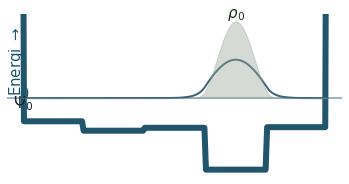

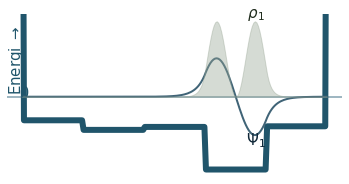

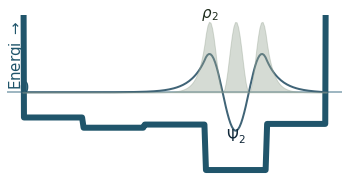

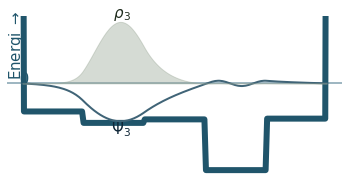

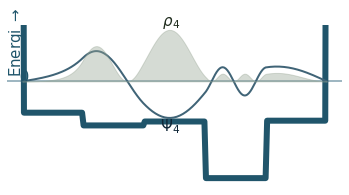

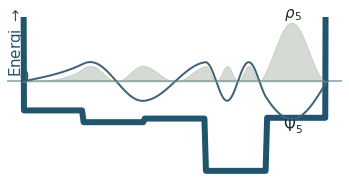

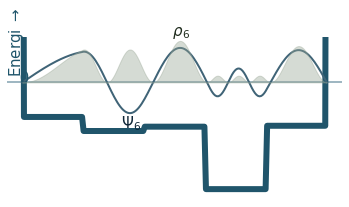

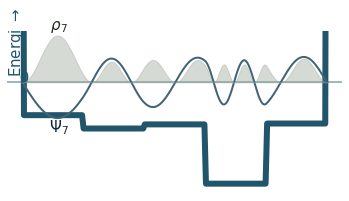

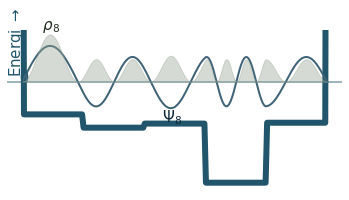

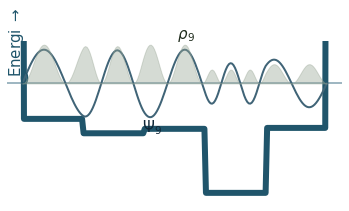

In [4]:
from scipy.interpolate import interp1d #I will use this for both the potential and the colors
import numpy as np
import matplotlib.pyplot as plt

# some nice colors, feel free to experiment 
colorx = np.zeros((3,5), dtype = np.float)
colorx[:,0] = np.array([0.44,0.7,.76])
colorx[:,1] = np.array([0.1,0.1,.2])
colorx[:,2] = np.array([0.97,0.9,.63])
colorx[:,3] = np.array([0.37,0.02,.13])
colorx[:,4] = np.array([0.41,0.87,.62])
colorx = colorx**1.1
palette = interp1d(np.linspace(0,1,5), colorx)
c1,c2,c3, c4 = palette(np.random.uniform(0,1,4)).T



Nx = 200 #number of grid-points
x = np.linspace(-1,1,Nx) #the grid itself
a = 0.5 #we are only interested in the qualitative behaviour of the equation, this is a dummy parameter
dx = x[1]-x[0] # finite stepsize


# construct a potential
vx = -2*np.exp(-15*x**2) # 
nnx = 6
vx = interp1d(np.linspace(-1,1,nnx), np.random.uniform(-3,-.1, nnx), 0)(x) #uncomment for random potential
vx[0] = 10
vx[-1] = 10


# set up the hamiltonian
h = np.diag(a*.5*np.ones(Nx)*4/dx**2 + 200*vx)
for i in range(1,Nx-2):
    h[i+1,i] = -a/dx**2
    h[i,i+1] = -a/dx**2

# diagonalize
e, psi = np.linalg.eigh(h)

# function to visualize the results
def visualize(e,psi,i):
    plt.figure(figsize = (6,3))
    plt.plot(x,vx, color = c1**2, linewidth = 6, zorder = 10)
    #i = 3
    plt.axhline(0, color = c3**.5, zorder = -1)
    plt.plot(x, 5*psi[:,i], color = c3, linewidth = 2, zorder = 11)
    plt.fill_between(x, 0*x, 50*psi[:,i]**2, color = c2**.5, alpha = .4, zorder = 21)
    #plt.plot(x, psi[:,1])
    plt.xlim(-1.1,1.1)
    plt.text(-1.05,0," 0 ", color = c1**2, ha = "left", fontsize = 15,  zorder = 20)

    ni = np.argmin(psi[:, i])
    plt.text(x[ni], 5*psi[ni, i]-.25," $\Psi_{%i}$ " %i, color =c3**2, ha = "center", fontsize = 15,  zorder = 20)


    ni = np.argmax(psi[:, i]**2)
    plt.text(x[ni], 50*psi[ni, i]**2+.1," $\\rho_{%i}$ " %i, color =c2**2, ha = "center", fontsize = 15,  zorder = 20)

    plt.text(-1.1,.2, "Energi $\\rightarrow$", fontsize = 15, color = c1**2, rotation = 90)

    plt.ylim(vx.min()*1.1, 1.1*(50*psi[:,i]**2).max())
    plt.axis("off")
    #plt.savefig("lincomb_%i.png" % i,transparent = True, dpi = 300, bbox_inches = "tight") #uncomment to save
    plt.show()

# visualize the results
for i in range(10):
    visualize(e,psi,i)

```{admonition} Discussion
- Can you count the nodes? How do they relate to the energy?
- How does the probability density behave as the energy increase?
- Where is the probability highest for the ground state? What about the most excited state?
- What happens to the wavefunction at the endpoints? 
```